# Customer Segment Analysis

### Importing necessary libraries & Load the data

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import date
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
df = pd.read_excel(r'C:\Users\Sooraj\OneDrive\Desktop\ExcelR assignment\New folder (2)\marketing_campaign1 (1).xlsx')

### Data Exploration

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


## Data Cleaning & Feature Engineering

### Since Z_CostContact & Z_Revenue are constant values we can drop these for further analysis

In [10]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

### Handling missing values in income

In [11]:
# Calculate median income for each education level
median_income_by_education = df.groupby('Education')['Income'].median()

In [12]:
# Function to impute missing income values based on education level
def impute_income(row):
    if pd.isnull(row['Income']):
        return median_income_by_education[row['Education']]
    else:
        return row['Income']

In [13]:
# Apply imputation function to fill missing income values
df['Income'] = df.apply(impute_income, axis=1)

### Reducing features based on expense

In [14]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Reducing features based on Accepted campaign

In [15]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### Reducing features based on No. of purchases

In [16]:
df['Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Reducing features based on Education

In [17]:
# dividing the education levels into three categories based on undergraduate, postgraduate, and doctoral degrees
# 2nd Cycle: This refers to postgraduate studies following completion of the 1st cycle, leading to a master's degree.
df['Education'] = df['Education'].replace(['2n Cycle', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic','Graduation'], 'Under Graduate')

### Age from year of birth

In [18]:
df['Age'] = 2024 - df['Year_Birth']

###  customer enrolement date

In [19]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [20]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x:x.days)

### Reducing features based on Marital_Status

In [21]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

### Reducing features based on No. of kids

In [22]:
df['Children'] = df['Kidhome'] + df['Teenhome']

### Reducing features based on family size

In [23]:
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2}) + df['Children']

### Reducing features based on parenthood

In [24]:
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

### Dropping redundant columns

In [25]:
col_del = ['Marital_Status', 'Dt_Customer', 'Year_Birth', 'ID', 'Kidhome', 'Teenhome']
df=df.drop(columns=col_del,axis=1)

In [26]:
df.nunique()

Education                 3
Income                 1976
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Expenses               1054
AcceptedCmp               6
Purchases                39
Age                      59
Customer_For            663
Living_With               2
Children                  4
Family_Size               5
Is_Parent                 2
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  AcceptedCmp3         2240 non-null   int64  
 15  AcceptedCmp4         2240 non-null   i

## Univariate analysis for Categorical variables

In [28]:
def bar(col):
    column_counts = df[col].value_counts()
    plt.figure(figsize=(10, 6))
    column_counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [29]:
def pie(column_name):
    column_counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column_name}')
    plt.axis('equal')
    plt.show()

### 1.Analysis on  Education.

In [30]:
df['Education'].unique()

array(['Under Graduate', 'PhD', 'Post Graduate'], dtype=object)

In [31]:
df['Education'].value_counts()

Under Graduate    1181
Post Graduate      573
PhD                486
Name: Education, dtype: int64

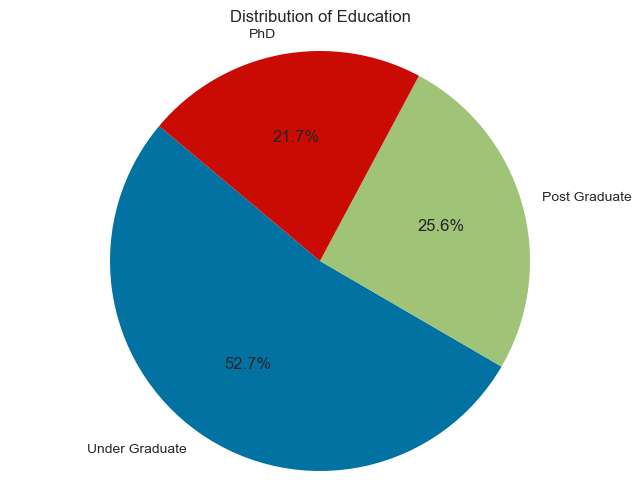

In [32]:
pie('Education')

### 2.Analysis on  Living_With

In [33]:
df['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [34]:
df['Living_With'].value_counts()

Partner    1444
Alone       796
Name: Living_With, dtype: int64

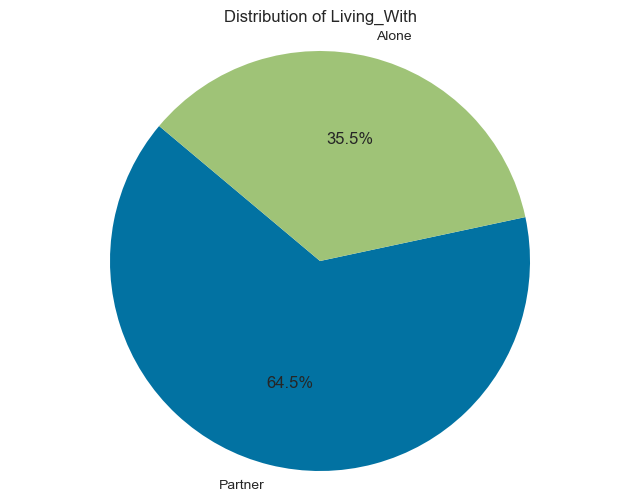

In [35]:
pie('Living_With')

### 3.Analysis on  Is_Parent

In [36]:
df['Is_Parent'].unique()

array([0, 1])

In [37]:
df['Is_Parent'].value_counts()

1    1602
0     638
Name: Is_Parent, dtype: int64

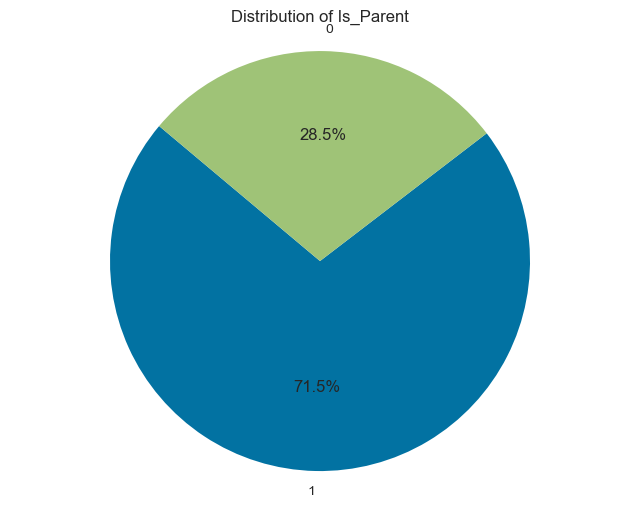

In [38]:
pie('Is_Parent')

### 4.Analysis on  Complain

In [39]:
df['Complain'].unique()

array([0, 1], dtype=int64)

In [40]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

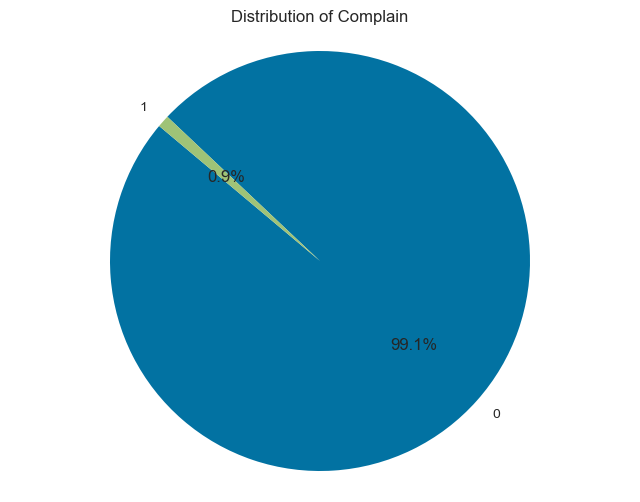

In [41]:
pie('Complain')

### 5.Analysis on  AcceptedCmp

In [42]:
df['AcceptedCmp'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [43]:
df['AcceptedCmp'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: AcceptedCmp, dtype: int64

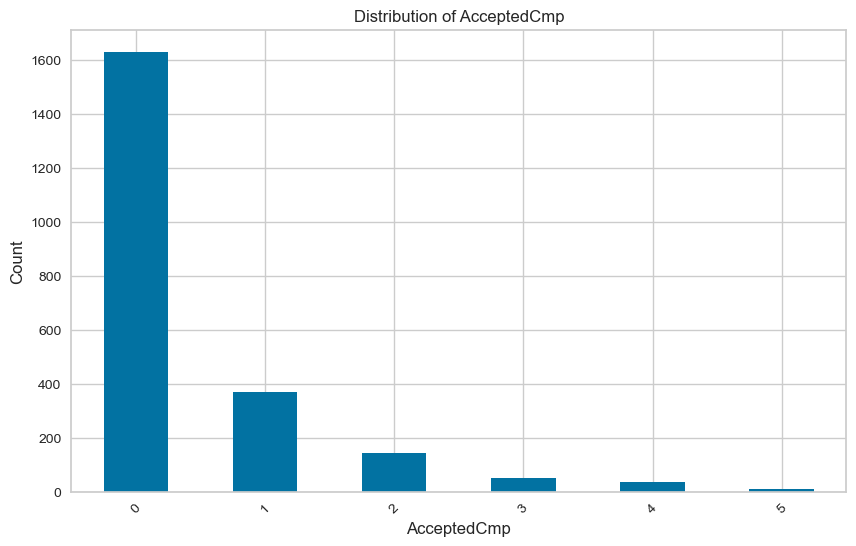

In [44]:
bar('AcceptedCmp')

### 6.Analysis on no. of kids.

In [45]:
df['Children'].unique()

array([0, 2, 1, 3], dtype=int64)

In [46]:
df['Children'].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

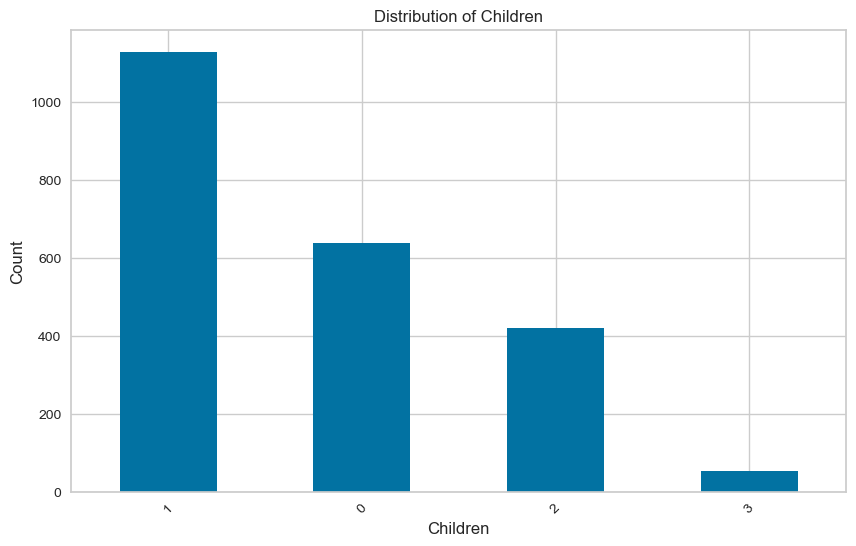

In [47]:
bar('Children')

### 7.Analysis on Family size.

In [48]:
df['Family_Size'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [49]:
df['Family_Size'].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

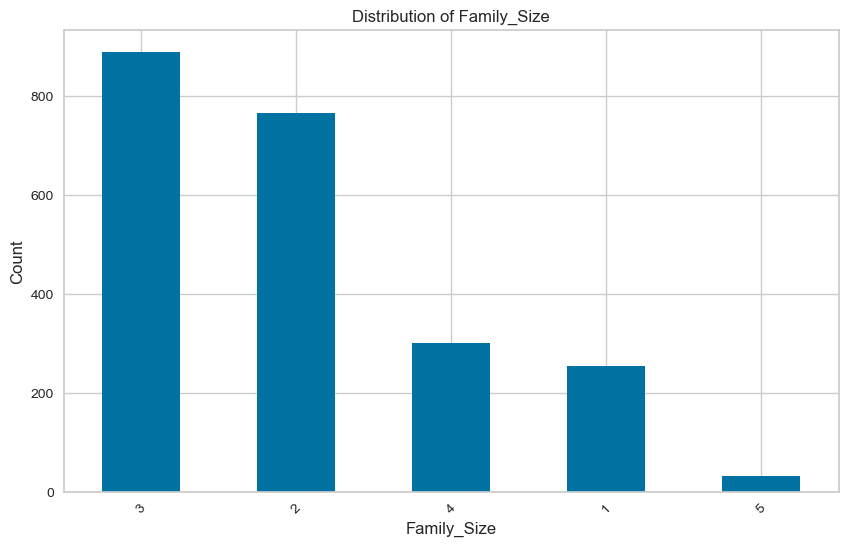

In [50]:
bar('Family_Size')

### 7.Analysis on Age.

Text(0.5, 1.0, 'Age')

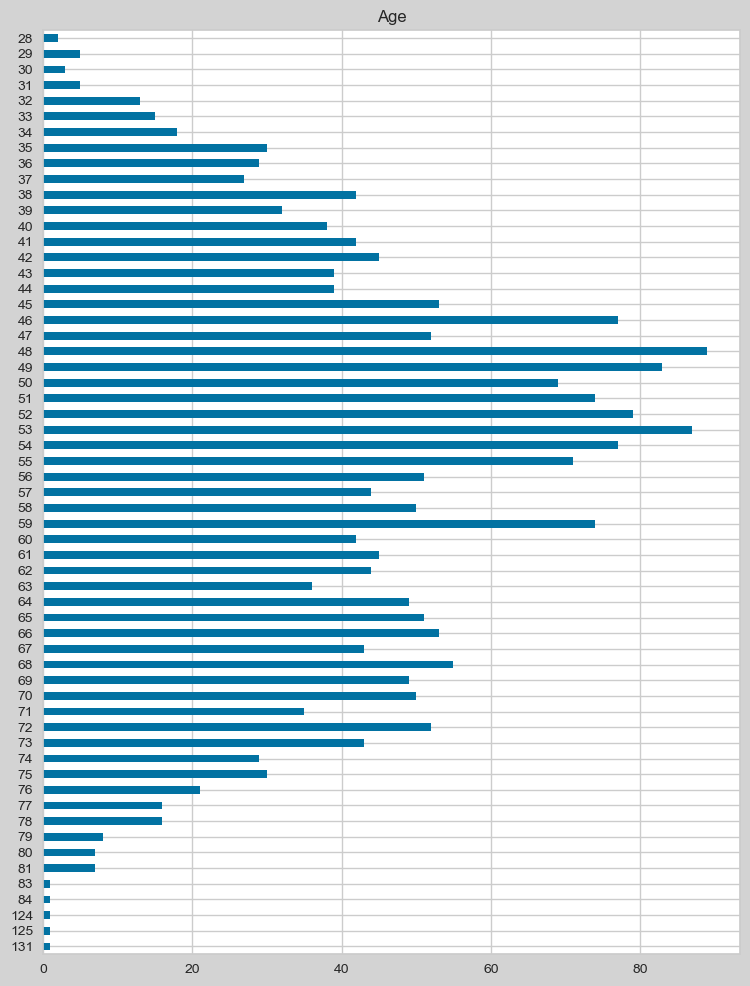

In [51]:
plt.figure(figsize=(9,12), facecolor='lightgray')
df['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

## Univariate analysis for Numerical variables

In [52]:
def distplot(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=20, kde=True)
    plt.title(f'Distribution Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

### 8.Analysis on Income

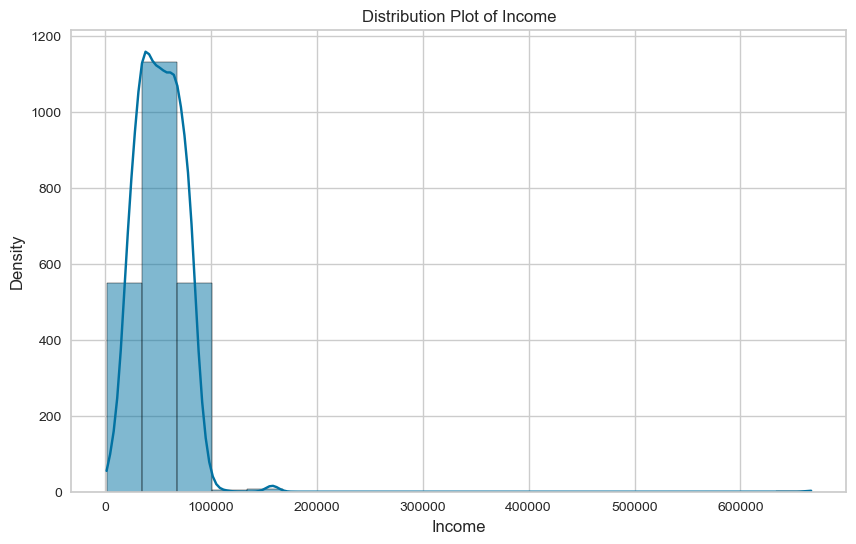

In [53]:
distplot('Income')

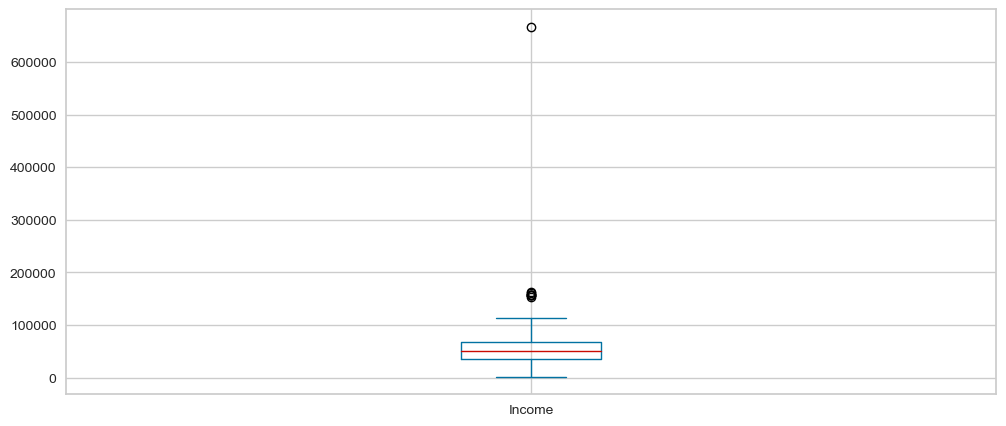

In [54]:
df["Income"].plot.box(figsize=(12,5))
plt.show()

### 9.Analysis on Expense

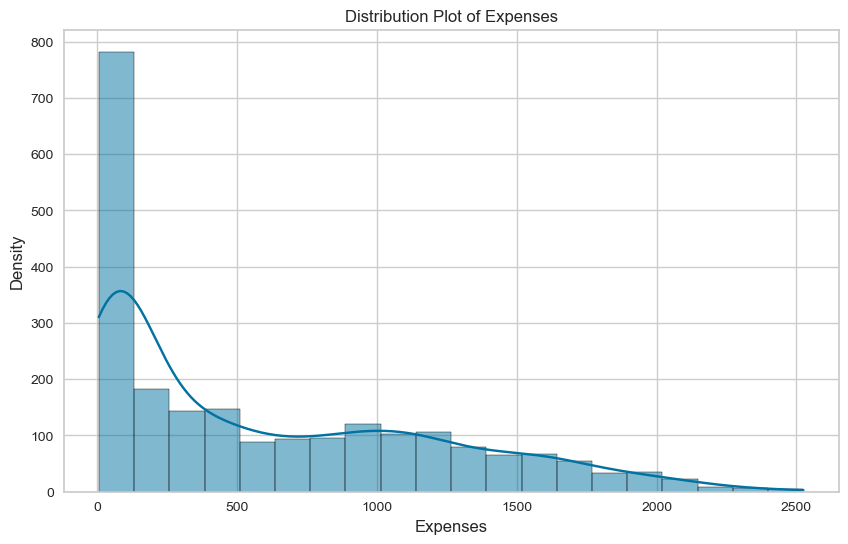

In [55]:
distplot('Expenses')

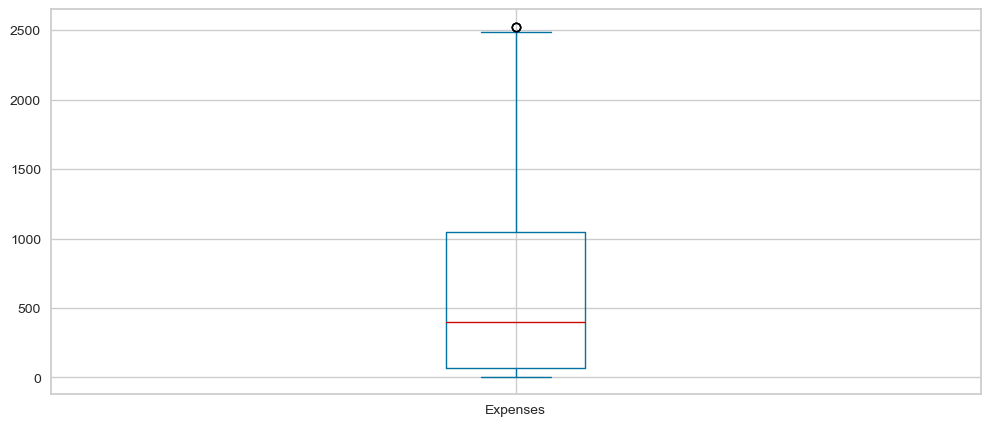

In [56]:
df["Expenses"].plot.box(figsize=(12,5))
plt.show()

### 10.Analysis on Purchases

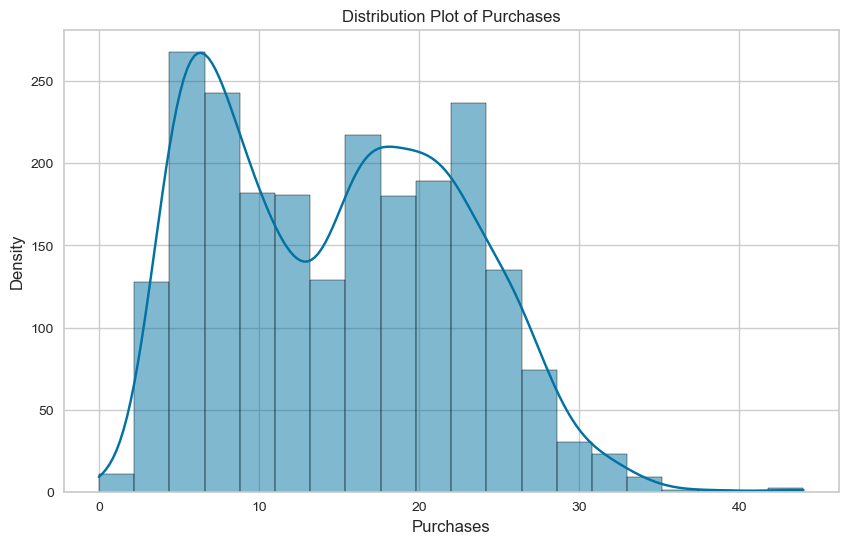

In [57]:
distplot('Purchases')

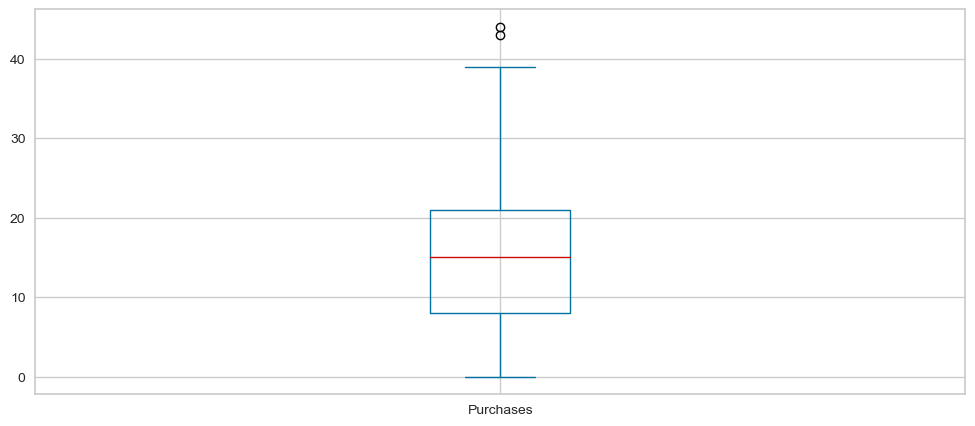

In [58]:
df["Purchases"].plot.box(figsize=(12,5))
plt.show()

### 11.Analysis on Recency

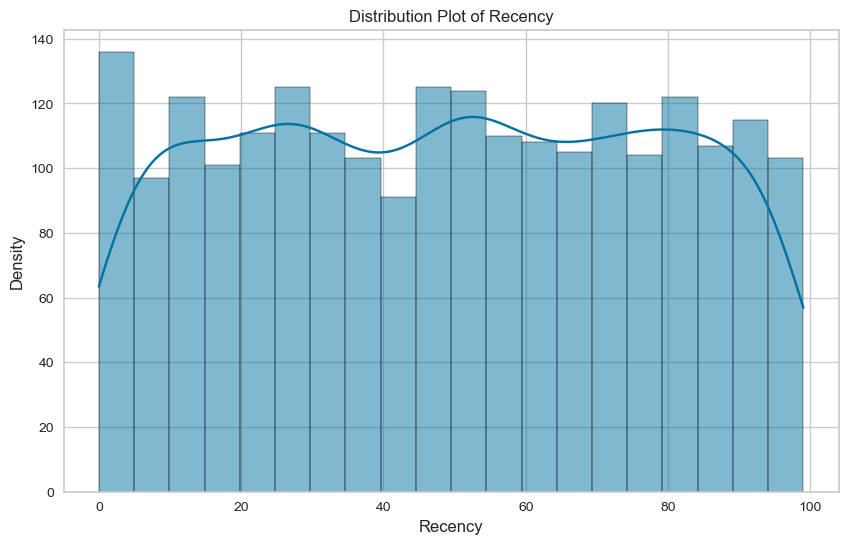

In [59]:
distplot('Recency')

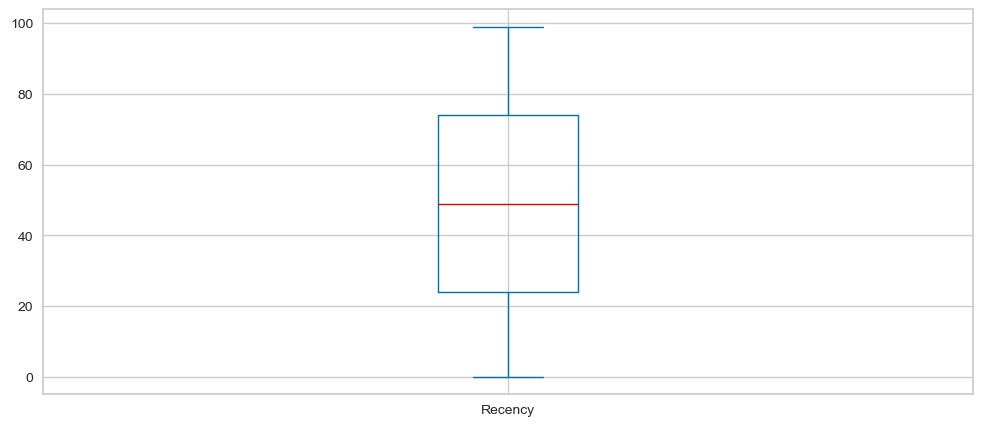

In [60]:
df["Recency"].plot.box(figsize=(12,5))
plt.show()

### 12.Analysis on Customer enrolement date

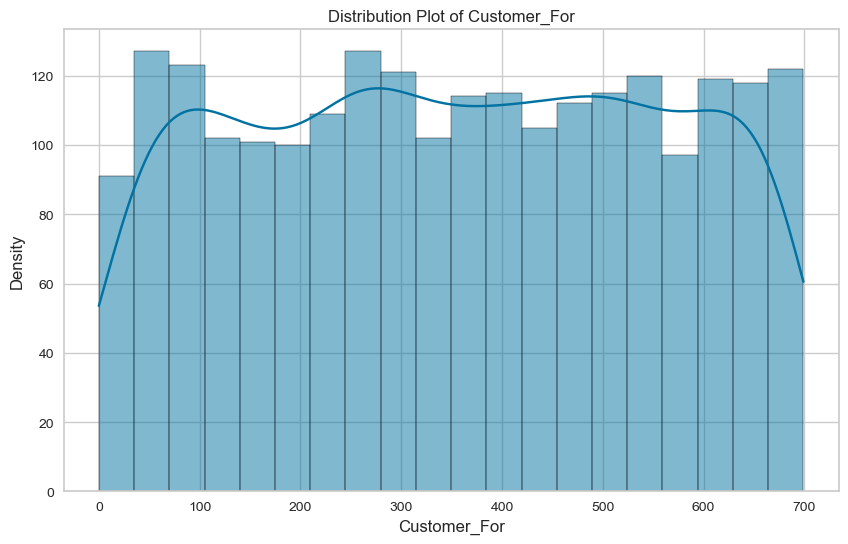

In [61]:
distplot('Customer_For')

## Bivariate Analysis

### 1.Education vs Expenses

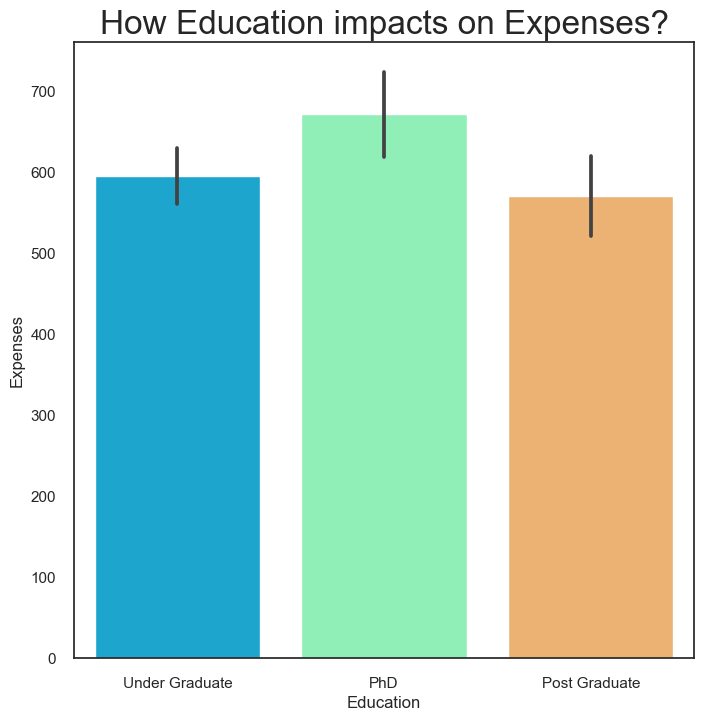

In [62]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

### 2.Marital status vs Expenses

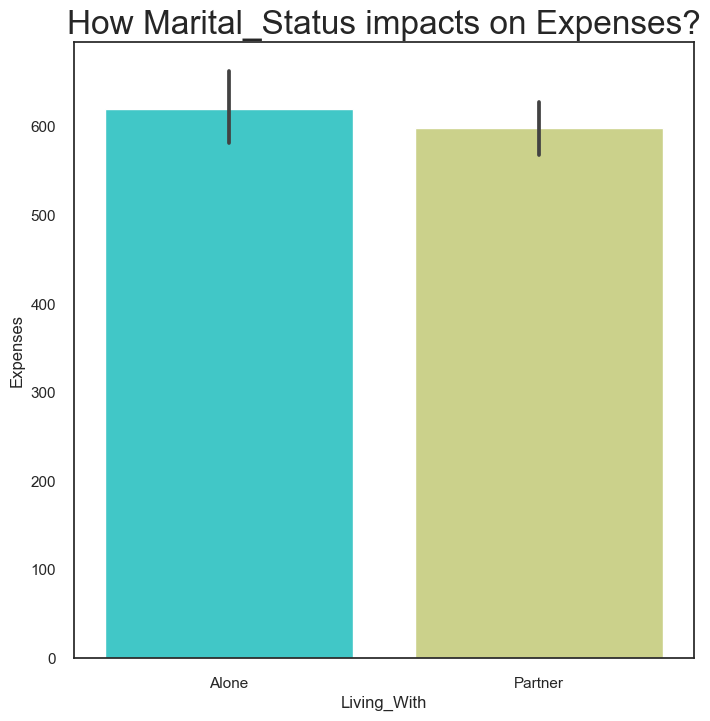

In [63]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Living_With", y="Expenses", data=df,palette="rainbow")

### 3.Kids vs Expenses

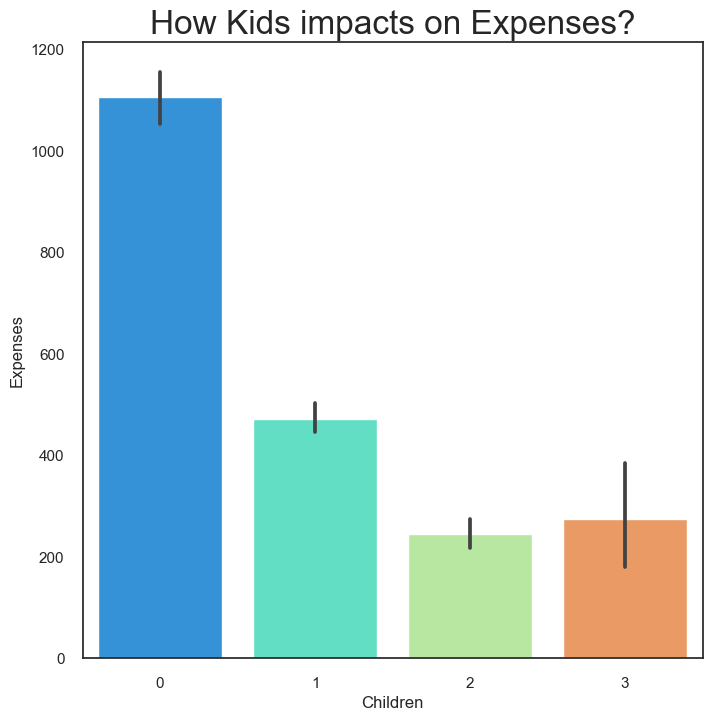

In [64]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Children", y="Expenses", data=df,palette="rainbow")

### 4.TotalAcceptedCmp vs Expenses

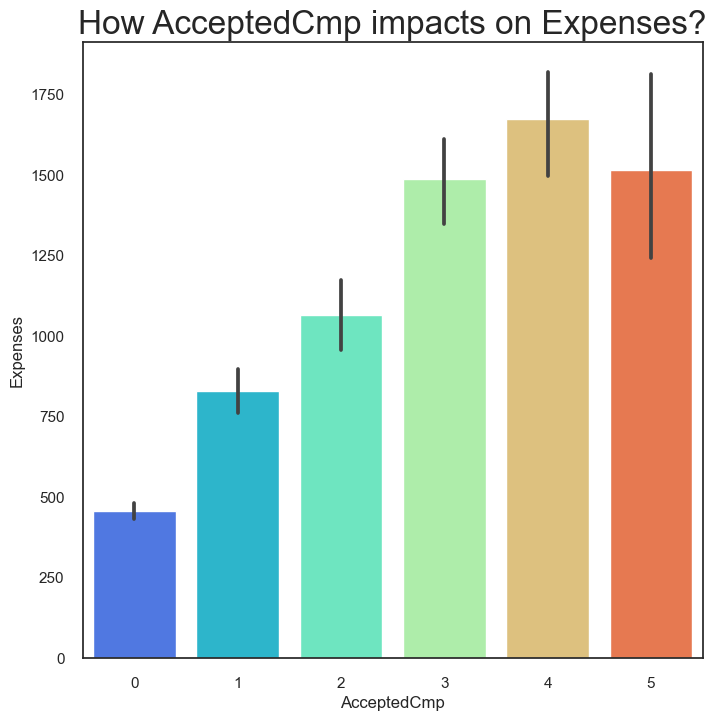

In [65]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How AcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="AcceptedCmp", y="Expenses", data=df,palette="rainbow")

### 5.NumTotalPurchases vs Expenses

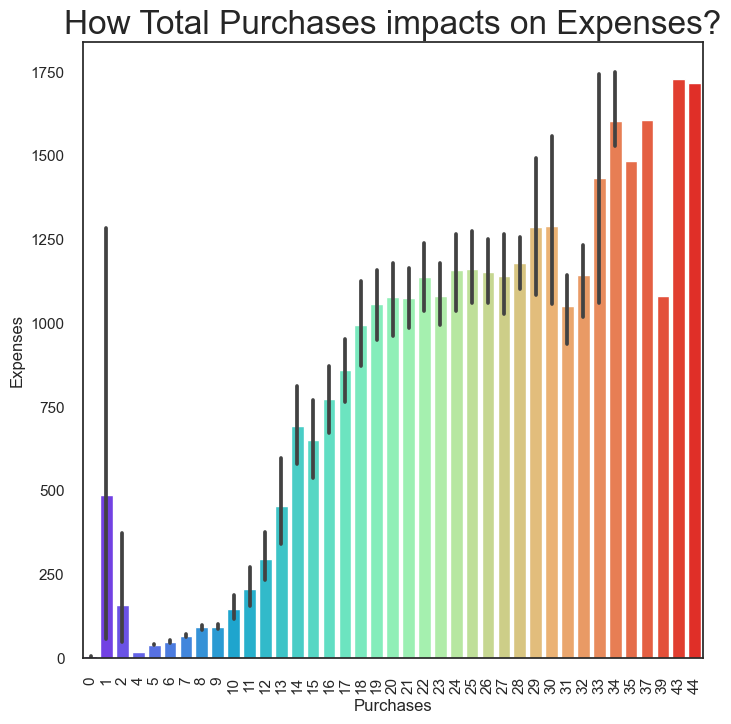

In [66]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Total Purchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Purchases", y="Expenses", data=df,palette="rainbow")

### 6.Day engaged vs Expenses

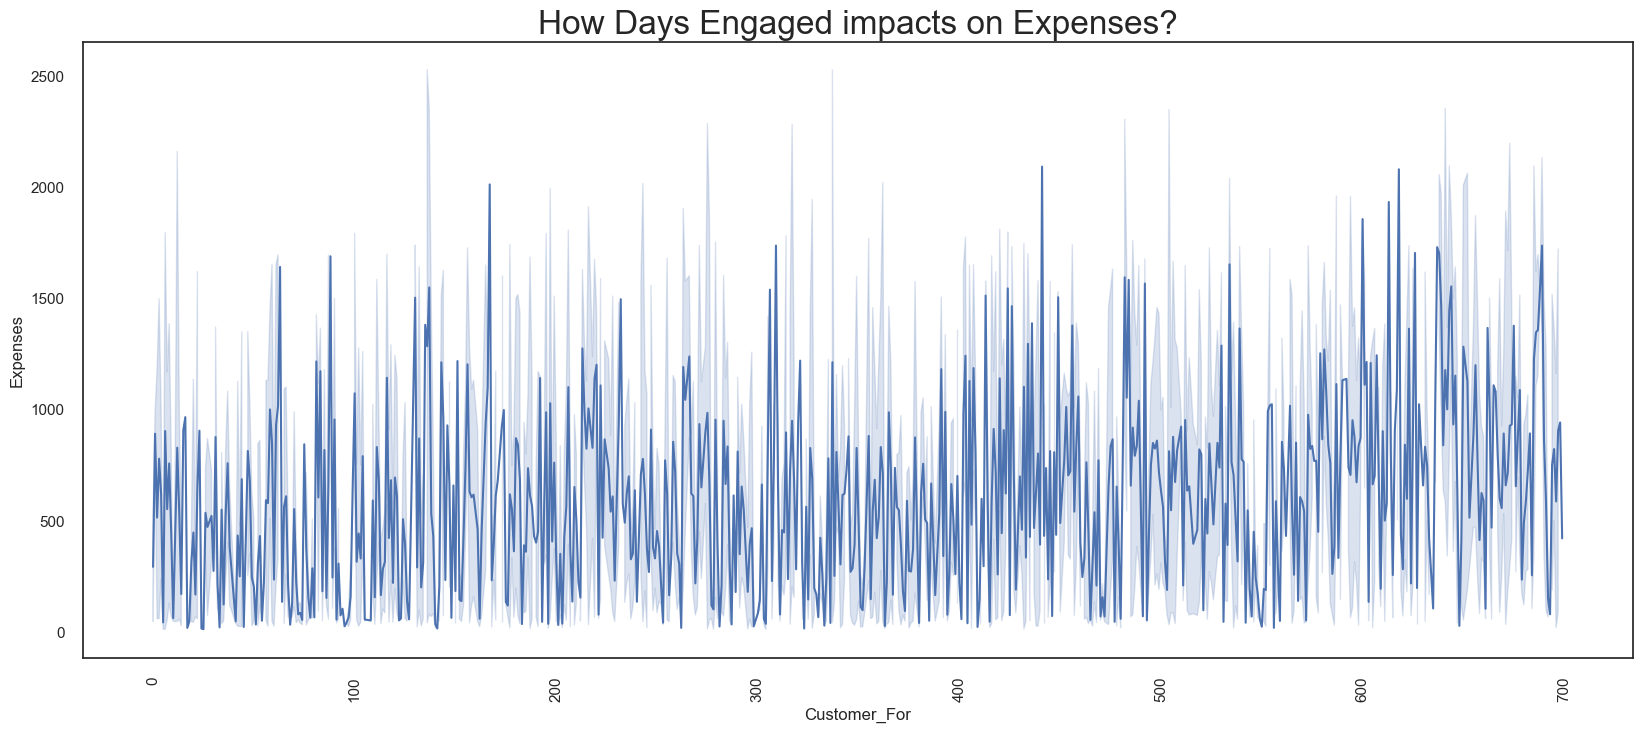

In [67]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=df,palette="rainbow")

### 7.Customer Age vs Expenses

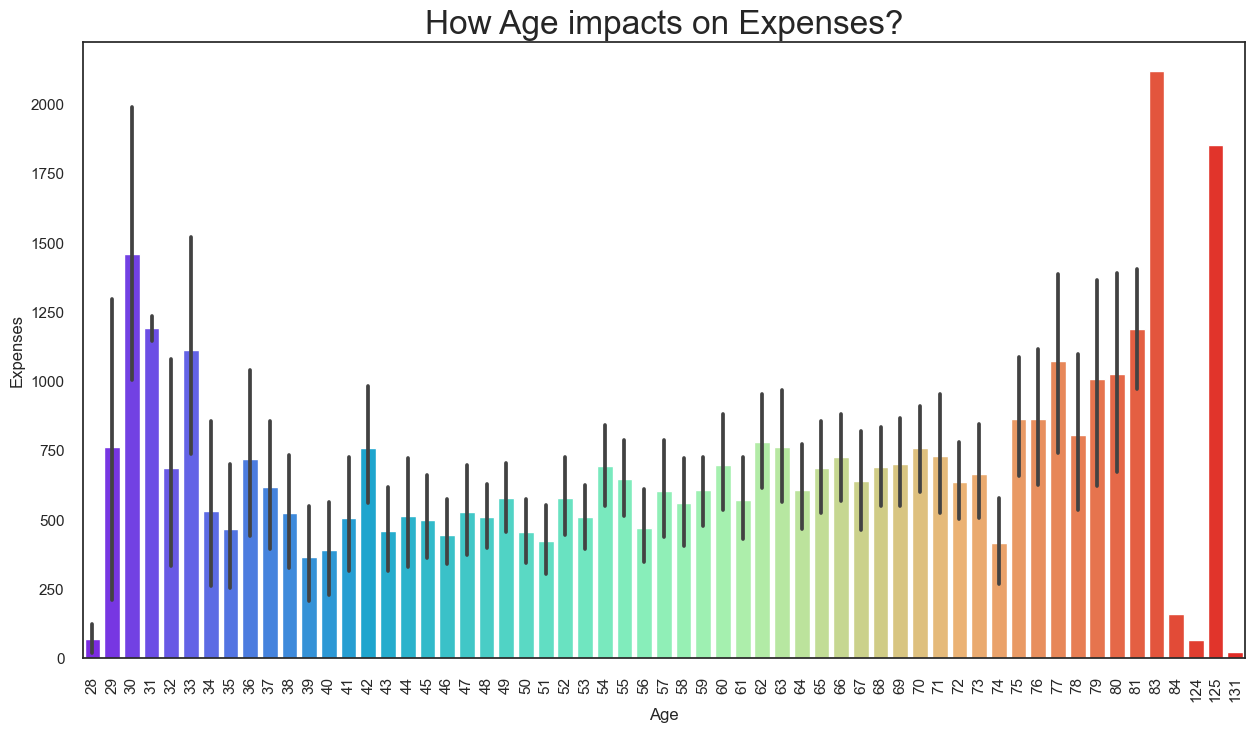

In [68]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Age", y="Expenses", data=df,palette="rainbow")

plt.show()

## Remove some outliers present in age and income

In [69]:
df = df[df['Age'] < 90]
df = df[df['Income'] < 300000]

In [70]:
df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Expenses', 'AcceptedCmp',
       'Purchases', 'Age', 'Customer_For', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [71]:
# Making a Subset to consider only relevant data for correlation
df = df[['Income', 'AcceptedCmp', 'Education', 'Expenses', 'Purchases', 'Age', 'Customer_For','Children','Living_With','Family_Size','Is_Parent']]

## Finding correlation

<Axes: >

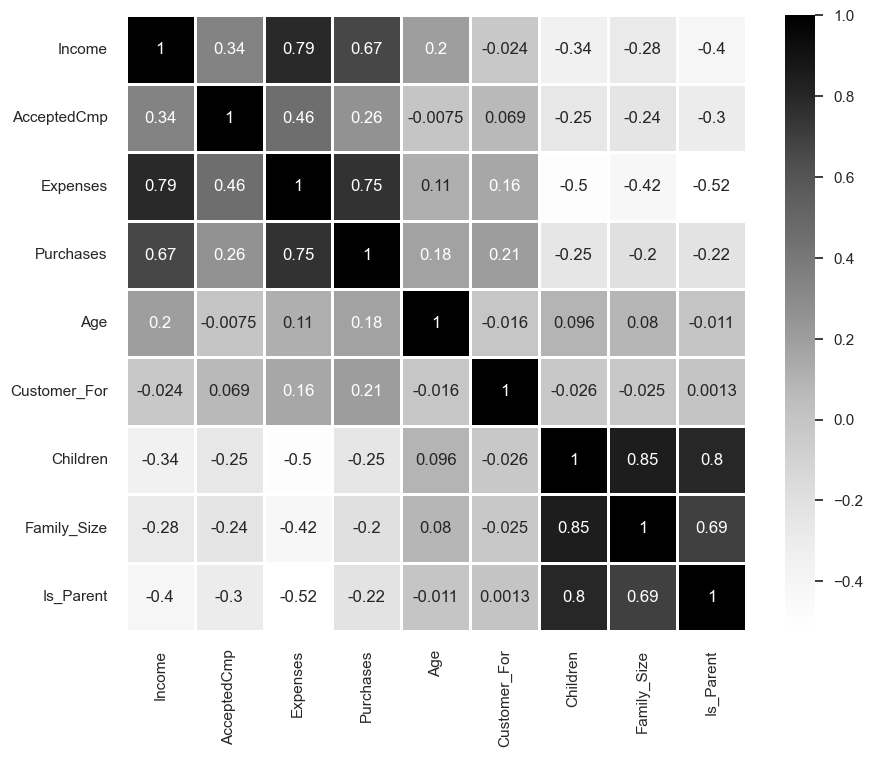

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'Greys',linewidths=1)

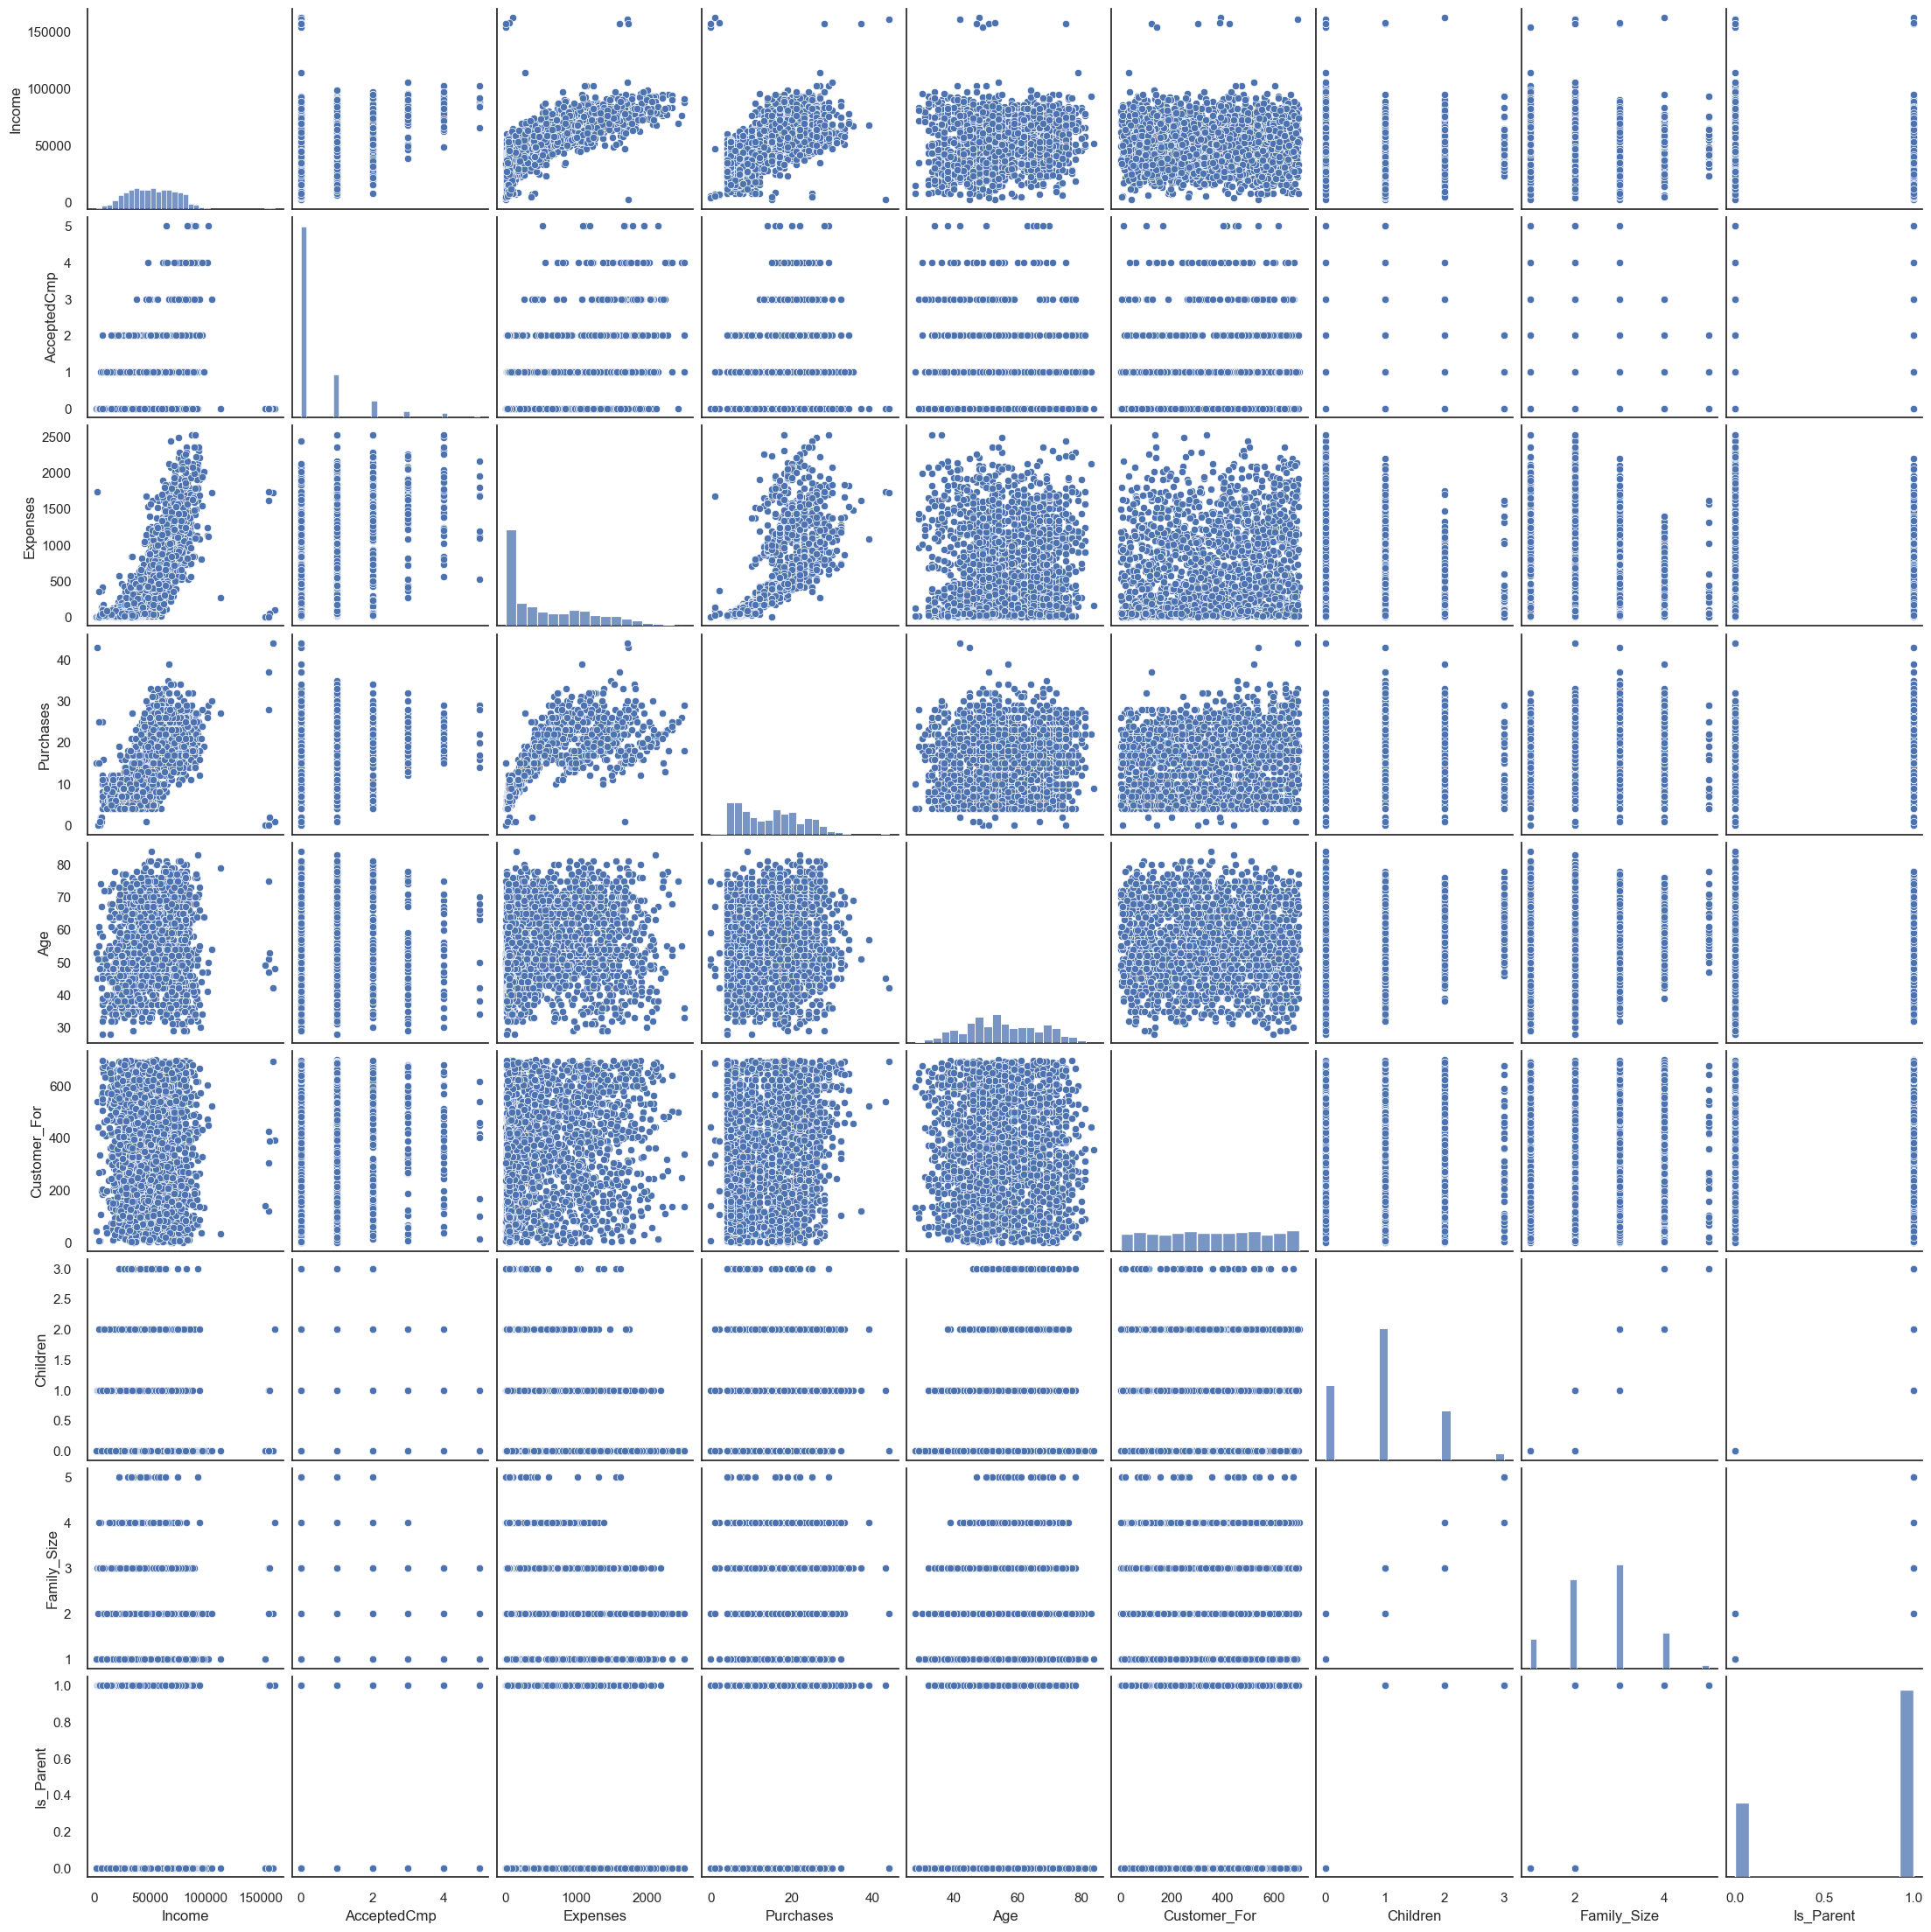

In [73]:
# Create pairplot
sns.pairplot(df)
plt.show()

## Standardizing numerical features

In [74]:
scaler = StandardScaler()
col_scale = ['Income', 'Children', 'Expenses',
       'AcceptedCmp', 'Purchases', 'Age', 'Customer_For']

df[col_scale] = scaler.fit_transform(df[col_scale])

## Encoding categorical variables

In [75]:
label_encoder = preprocessing.LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])

In [76]:
df.head()

,Income,AcceptedCmp,Education,Expenses,Purchases,Age,Customer_For,Children,Living_With,Family_Size,Is_Parent
0,0.288712,0.620456,2,1.680176,1.319340,1.016868,1.529793,-1.264308,0,1,0
1,-0.262203,-0.501987,2,-0.962202,-1.155857,1.273264,-1.191143,1.395139,0,3,1
2,0.918149,-0.501987,2,0.282541,0.798246,0.333146,-0.206659,-1.264308,1,2,0
3,-1.182324,-0.501987,2,-0.918994,-0.895310,-1.290693,-1.062517,0.065416,1,3,1
4,0.295952,-0.501987,0,-0.305762,0.537699,-1.034298,-0.953679,0.065416,1,3,1


Dimensionality Reduction

In [77]:
pca = PCA()
pcs = pca.fit_transform(df)
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10
0,3.017278,-0.251253,-1.034344,-1.474925,0.579400,-0.732745,-0.506760,-0.354011,-0.506077,0.173322,-3.645492e-16
1,-1.941632,0.659794,1.438558,-0.316626,0.386594,-1.084652,-0.751557,0.636013,-0.142474,0.118112,1.224510e-15
2,1.500528,-0.392870,0.470009,-0.815173,-0.837636,-0.569579,0.556420,-0.112778,0.544254,0.309138,-8.283254e-16
3,-1.915469,-1.269565,0.277134,0.786350,-0.706977,-0.397886,0.283789,-0.445307,-0.070788,-0.151171,1.328530e-15
4,-0.282133,0.112380,0.637664,0.838816,-0.992951,1.504277,0.099921,-0.376549,0.421662,-0.117800,-2.614732e-15
...,...,...,...,...,...,...,...,...,...,...,...
2231,0.625261,0.747583,-0.228972,-0.112944,-0.897534,-0.602345,0.381863,0.094095,-0.709770,-0.387214,-1.003937e-16
2232,-1.152786,3.985872,1.854192,1.258382,0.595393,0.361184,-0.210497,-0.443055,0.073020,0.609879,1.769349e-16
2233,2.004895,-1.895558,0.529140,0.541818,-0.510485,-0.481476,-0.649205,-0.345159,-0.393389,0.229230,1.510075e-16
2234,0.638239,1.421703,1.270575,-0.301742,-0.634182,0.046555,0.146632,-0.410608,0.191548,-0.243272,2.383097e-17


In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.37206913, 0.53692445, 0.65609954, 0.75337558, 0.83779228,
       0.90652798, 0.94587783, 0.97759518, 0.99347683, 1.        ,
       1.        ])

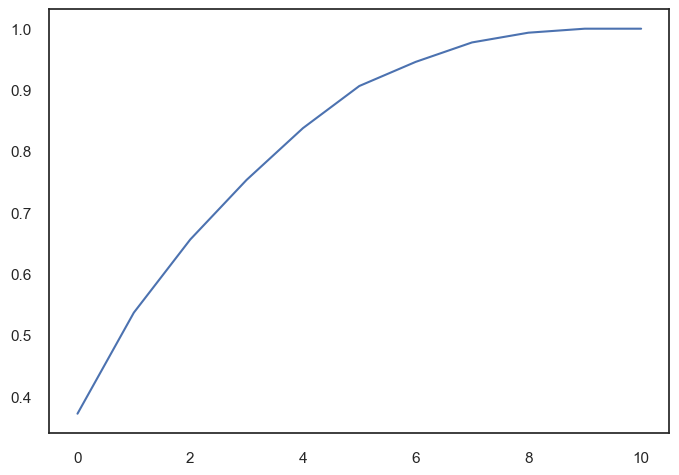

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [80]:
pca = PCA(n_components=6)
pcs = pca.fit_transform(df)
df_pca = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.017278,-0.251253,-1.034344,-1.474925,0.579400,-0.732745
1,-1.941632,0.659794,1.438558,-0.316626,0.386594,-1.084652
2,1.500528,-0.392870,0.470009,-0.815173,-0.837636,-0.569579
3,-1.915469,-1.269565,0.277134,0.786350,-0.706977,-0.397886
4,-0.282133,0.112380,0.637664,0.838816,-0.992951,1.504277
...,...,...,...,...,...,...
2231,0.625261,0.747583,-0.228972,-0.112944,-0.897534,-0.602345
2232,-1.152786,3.985872,1.854192,1.258382,0.595393,0.361184
2233,2.004895,-1.895558,0.529140,0.541818,-0.510485,-0.481476
2234,0.638239,1.421703,1.270575,-0.301742,-0.634182,0.046555


In [81]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2236.0,-1.175764e-16,1.820533,-3.575405,-1.542254,-0.336738,1.379616,5.486775
PC2,2236.0,1.811312e-16,1.211820,-3.740882,-0.876142,0.016471,0.836956,4.300076
PC3,2236.0,-7.944351e-18,1.030338,-2.300413,-0.818727,-0.016939,0.808332,3.018099
PC4,2236.0,4.925497e-17,0.930872,-2.713539,-0.562514,-0.008738,0.526540,4.363204
PC5,2236.0,2.224418e-17,0.867164,-2.847890,-0.541932,-0.043393,0.495052,3.936404
PC6,2236.0,-6.037707e-17,0.782489,-1.858732,-0.638991,-0.186766,0.564637,1.990291


Clustering

In [82]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_pca)
    wcss.append(km.inertia_)

In [83]:
wcss

[18048.13610322651,
 12506.163667715442,
 10847.506891199693,
 9564.626451647287,
 8580.45038037833,
 8030.962291986116,
 7576.52119544464,
 7155.9695822704725,
 6838.806337851993,
 6559.928710764107,
 6322.964795938062,
 6140.618811671927,
 5892.649309099741,
 5737.755206174569,
 5566.858794994332,
 5434.380986881087,
 5279.293710037485,
 5141.383268556305,
 5004.190649568968]

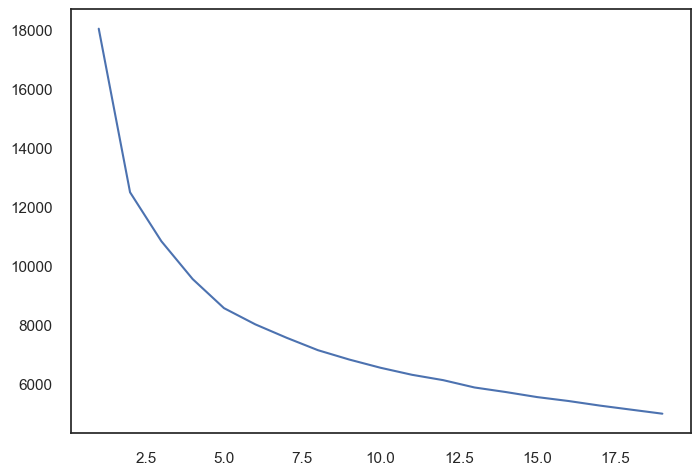

In [84]:
plt.plot(range(1,20),wcss)

In [85]:
km = KMeans(n_clusters=4)
labels = km.fit_predict(df_pca)
labels

array([2, 1, 2, ..., 2, 0, 1])

In [86]:
km.cluster_centers_

array([[ 0.58065165,  0.93477782, -0.27256911, -0.22470473, -0.38213139,
         0.05670714],
       [-1.79494744,  0.8915575 ,  0.34713339,  0.21452179,  0.23714287,
        -0.05669611],
       [ 2.58462014, -0.40689158,  0.23815794,  0.14800603,  0.09344358,
        -0.03027122],
       [-1.25287645, -1.21298484, -0.19769315, -0.0705947 ,  0.10210867,
         0.01408895]])

In [87]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [88]:
silhouette_score(df_pca,labels)

0.19528868281234749

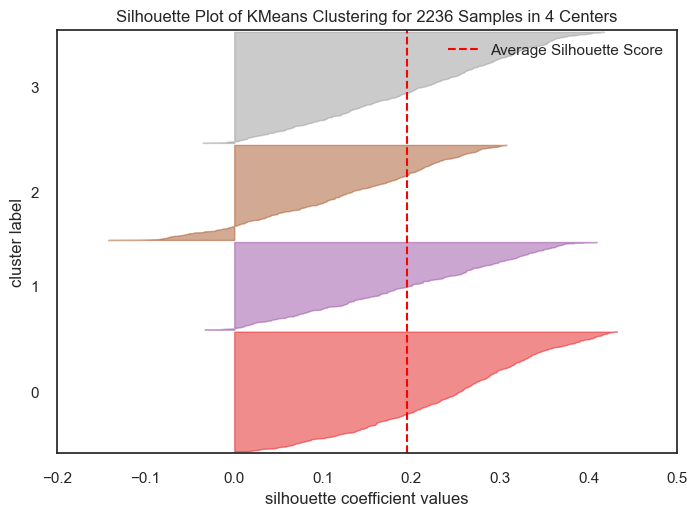

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2236 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [89]:
silhouettevis = SilhouetteVisualizer(KMeans(n_clusters=4))
vis = silhouettevis.fit(df_pca)
vis.show()

In [90]:
sil_score = []

for i in range(4,10):
    kms = KMeans(n_clusters=i)
    kmlabels = kms.fit_predict(df_pca)
    sil_score.append(silhouette_score(df_pca,kmlabels))

In [91]:
sil_score

[0.19573558091611715,
 0.20416151638013388,
 0.18613469954278744,
 0.1838609996550209,
 0.18249114496597868,
 0.18509729611142464]

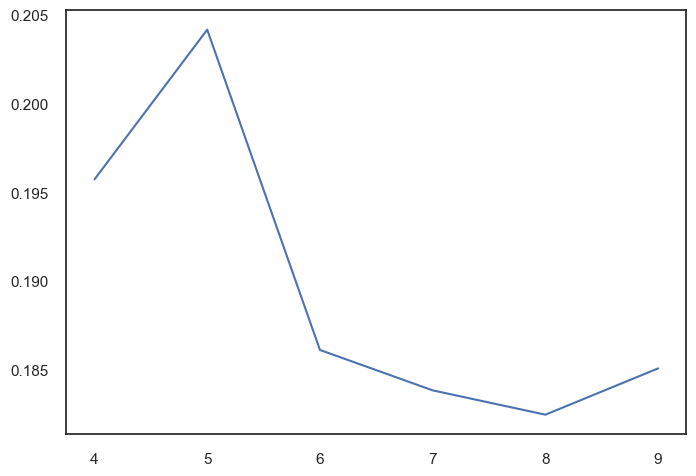

In [92]:
plt.plot(range(4,10),sil_score)

In [93]:
df['Clusters']=labels

In [94]:
df.groupby(['Clusters']).mean()

,Income,AcceptedCmp,Education,Expenses,Purchases,Age,Customer_For,Children,Living_With,Family_Size,Is_Parent
Clusters,,,,,,,,,,,
0,0.429971,-0.189884,1.254606,0.391033,0.902988,0.335150,0.353787,0.201284,0.688442,2.790620,0.951424
1,-0.439685,-0.294731,1.178423,-0.774045,-0.669358,0.417725,-0.350034,1.248925,0.715768,3.605809,1.000000
2,1.148764,0.878640,1.272904,1.309948,0.721555,0.032435,-0.041262,-1.160625,0.571150,1.649123,0.074074
3,-0.984597,-0.303294,1.492236,-0.826646,-0.910886,-0.649173,-0.033117,-0.196812,0.610248,2.413043,0.793478


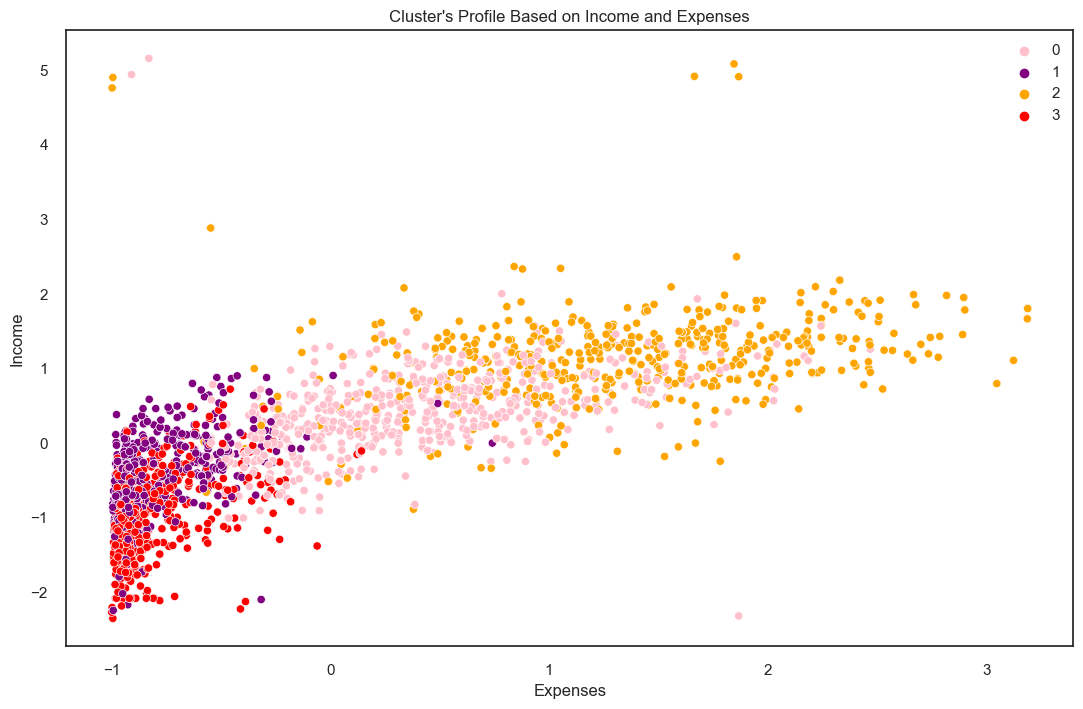

In [95]:
colors =['#FFC0CB','#800080','#FFA500','#FF0000']
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=df, x=df['Expenses'], y=df['Income'], hue=df['Clusters'],palette=colors)
pl.set_title("Cluster's Profile Based on Income and Expenses")
plt.legend();

Income vs spending plot shows the clusters pattern

group 2: low spending & low income

group 1: high spending & average income

group 3: high spending & high income

group 0: low spending & average income


Splitting the data

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
df.head()

,Income,AcceptedCmp,Education,Expenses,Purchases,Age,Customer_For,Children,Living_With,Family_Size,Is_Parent,Clusters
0,0.288712,0.620456,2,1.680176,1.319340,1.016868,1.529793,-1.264308,0,1,0,2
1,-0.262203,-0.501987,2,-0.962202,-1.155857,1.273264,-1.191143,1.395139,0,3,1,1
2,0.918149,-0.501987,2,0.282541,0.798246,0.333146,-0.206659,-1.264308,1,2,0,2
3,-1.182324,-0.501987,2,-0.918994,-0.895310,-1.290693,-1.062517,0.065416,1,3,1,3
4,0.295952,-0.501987,0,-0.305762,0.537699,-1.034298,-0.953679,0.065416,1,3,1,0


In [98]:
column_data_types = df.dtypes
print(column_data_types)

Income          float64
AcceptedCmp     float64
Education         int32
Expenses        float64
Purchases       float64
Age             float64
Customer_For    float64
Children        float64
Living_With       int32
Family_Size       int64
Is_Parent         int32
Clusters          int32
dtype: object


In [99]:
# Convert the columns to the appropriate data types
df['Education'] = df['Education'].astype('category')
df['Living_With'] = df['Living_With'].astype('category')
df['Family_Size'] = df['Family_Size'].astype('float64')
df['Is_Parent'] = df['Is_Parent'].astype('category')
df['Clusters'] = df['Clusters'].astype('category')

# Verify the data types after conversion
print(df.dtypes)

Income           float64
AcceptedCmp      float64
Education       category
Expenses         float64
Purchases        float64
Age              float64
Customer_For     float64
Children         float64
Living_With     category
Family_Size      float64
Is_Parent       category
Clusters        category
dtype: object


In [100]:
X = df.iloc[:,:11]
Y = df['Clusters']

In [101]:
X.head()

,Income,AcceptedCmp,Education,Expenses,Purchases,Age,Customer_For,Children,Living_With,Family_Size,Is_Parent
0,0.288712,0.620456,2,1.680176,1.319340,1.016868,1.529793,-1.264308,0,1.0,0
1,-0.262203,-0.501987,2,-0.962202,-1.155857,1.273264,-1.191143,1.395139,0,3.0,1
2,0.918149,-0.501987,2,0.282541,0.798246,0.333146,-0.206659,-1.264308,1,2.0,0
3,-1.182324,-0.501987,2,-0.918994,-0.895310,-1.290693,-1.062517,0.065416,1,3.0,1
4,0.295952,-0.501987,0,-0.305762,0.537699,-1.034298,-0.953679,0.065416,1,3.0,1


In [102]:
Y.head()

0    2
1    1
2    2
3    3
4    0
Name: Clusters, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [103]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [104]:
print(Xtrain.shape , Xtest.shape , Ytrain.shape ,Ytest.shape)

(1788, 11) (448, 11) (1788,) (448,)


Model Building

In [105]:
from sklearn.metrics import classification_report , accuracy_score

Logistic Regression model

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
LR_model = LogisticRegression()

LR_model.fit(Xtrain,Ytrain)

LRpred = LR_model.predict(Xtest)

In [108]:
print(classification_report(Ytest,LRpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       113
           1       1.00      0.98      0.99        94
           2       0.99      0.99      0.99       108
           3       0.99      1.00      1.00       133

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



KNN model

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
KNN_model = KNeighborsClassifier()

KNN_model.fit(Xtrain,Ytrain)

KNNpred = KNN_model.predict(Xtest)

In [111]:
print(classification_report(Ytest,KNNpred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       113
           1       0.95      0.94      0.94        94
           2       0.97      0.96      0.97       108
           3       0.97      0.96      0.97       133

    accuracy                           0.96       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.96      0.96      0.96       448



Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
DT_model = DecisionTreeClassifier(criterion='entropy')

DT_model.fit(Xtrain,Ytrain)

DTpred = DT_model.predict(Xtest)

In [114]:
print(classification_report(Ytest,DTpred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       113
           1       0.94      0.95      0.94        94
           2       0.97      0.94      0.96       108
           3       0.94      0.96      0.95       133

    accuracy                           0.94       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.94      0.94      0.94       448



[Text(0.5768629807692308, 0.9615384615384616, 'x[3] <= -0.242\nentropy = 1.99\nsamples = 1788\nvalue = [484, 388, 405, 511]'),
 Text(0.37271634615384613, 0.8846153846153846, 'x[7] <= 0.73\nentropy = 1.357\nsamples = 962\nvalue = [68, 381, 10, 503]'),
 Text(0.17235576923076923, 0.8076923076923077, 'x[3] <= -0.707\nentropy = 1.076\nsamples = 648\nvalue = [61, 79, 10, 498]'),
 Text(0.05384615384615385, 0.7307692307692307, 'x[0] <= -0.109\nentropy = 0.423\nsamples = 453\nvalue = [1, 31, 2, 419]'),
 Text(0.023076923076923078, 0.6538461538461539, 'x[5] <= -0.393\nentropy = 0.251\nsamples = 430\nvalue = [0, 18, 0, 412]'),
 Text(0.015384615384615385, 0.5769230769230769, 'entropy = 0.0\nsamples = 274\nvalue = [0, 0, 0, 274]'),
 Text(0.03076923076923077, 0.5769230769230769, 'x[6] <= -1.293\nentropy = 0.516\nsamples = 156\nvalue = [0, 18, 0, 138]'),
 Text(0.015384615384615385, 0.5, 'x[9] <= 2.5\nentropy = 0.994\nsamples = 22\nvalue = [0, 10, 0, 12]'),
 Text(0.007692307692307693, 0.423076923076923

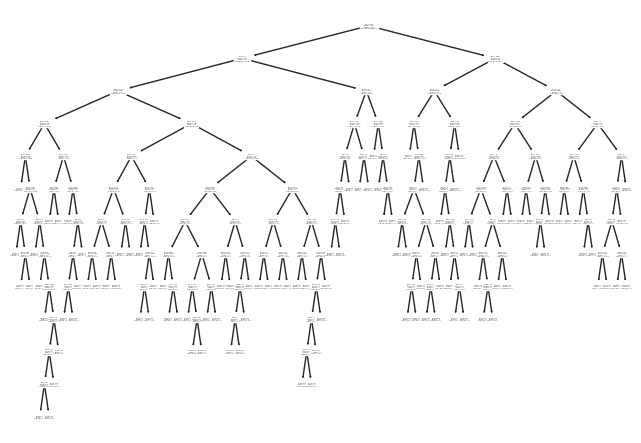

In [115]:
from sklearn import tree
tree.plot_tree(DT_model)

Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
RF_model = RandomForestClassifier(criterion='entropy')

RF_model.fit(Xtrain, Ytrain)

RFpred = RF_model.predict(Xtest)

In [118]:
print(classification_report(Ytest , RFpred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       113
           1       0.97      0.96      0.96        94
           2       0.97      0.99      0.98       108
           3       0.97      0.98      0.98       133

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



Adaboost

In [119]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
AD_model = AdaBoostClassifier(n_estimators=100 , random_state=25)

AD_model.fit(Xtrain,Ytrain)

ADpred = AD_model.predict(Xtest)

In [121]:
print(classification_report(Ytest , ADpred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       113
           1       0.89      0.74      0.81        94
           2       0.98      0.94      0.96       108
           3       0.81      0.90      0.85       133

    accuracy                           0.88       448
   macro avg       0.89      0.87      0.88       448
weighted avg       0.88      0.88      0.88       448



Model Validation

In [122]:
from sklearn.model_selection import KFold , cross_val_score

In [123]:
kfold_LR = cross_val_score(LR_model, X,Y, cv=5)
print('KFold validation score of Logistic Regression model is ',kfold_LR.mean())

kfold_KNN = cross_val_score(KNN_model, X,Y, cv=5)
print('KFold validation score of KNN model is ',kfold_KNN.mean())

kfold_DT = cross_val_score(DT_model, X,Y, cv=5)
print('KFold validation score of Decision Tree model is ',kfold_DT.mean())

kfold_RF = cross_val_score(RF_model, X,Y, cv=5)
print('KFold validation score of Random Forest model is ',kfold_RF.mean())

kfold_AD = cross_val_score(AD_model, X,Y, cv=5)
print('KFold validation score of Adaboost model is ',kfold_AD.mean())

KFold validation score of Logistic Regression model is  0.9856883189517417
KFold validation score of KNN model is  0.9476749760306807
KFold validation score of Decision Tree model is  0.9244267337807607
KFold validation score of Random Forest model is  0.957518376478108
KFold validation score of Adaboost model is  0.861839844998402


In [124]:
kfold_score = {'Kfold_Score':[0.985,0.947,0.924,0.957,0.861]}

In [125]:
df_score = pd.DataFrame(kfold_score , index = ['LR_model','KNN_model','DT_model','RF_model','AD_model'])

In [126]:
df_score.sort_values(by='Kfold_Score',ascending=False)

,Kfold_Score
LR_model,0.983
RF_model,0.954
KNN_model,0.943
DT_model,0.933
AD_model,0.889


In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, Ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model
best_knn_model.fit(Xtrain, Ytrain)
y_pred = best_knn_model.predict(Xtest)
print("Accuracy:", accuracy_score(Ytest, y_pred))

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.9620535714285714


In [129]:
import joblib
joblib.dump(best_knn_model, 'best_knn_model.pkl')

['best_knn_model.pkl']

In [130]:
import joblib
joblib.dump(KNN_model, 'knn_model.pkl')

['knn_model.pkl']